روی داده های برق داده شده تمام کارهای مورد نیار را انجام داده و در انتها داده با فیچر های زیر را نیز پیش بینی کنید

"CO2Intensity"=491.32, "SystemLoadEA"=4241.05, "Day"=10, "ForecastWindProduction"=54.10, , "SMPEA"=49.56, "ORKTemperature"=9.0, "ORKWindspeed"=14.8, "ActualWindProduction"=54.0, "Month"=12, "SystemLoadEP2"=4426.84]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv('electricity.csv')
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [39]:
df=df.filter(['CO2Intensity','SystemLoadEA','Day','ForecastWindProduction','SMPEA','ORKTemperature','ORKWindspeed','ActualWindProduction','Month','SystemLoadEP2','SMPEP2'],axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CO2Intensity            38014 non-null  object
 1   SystemLoadEA            38014 non-null  object
 2   Day                     38014 non-null  int64 
 3   ForecastWindProduction  38014 non-null  object
 4   SMPEA                   38014 non-null  object
 5   ORKTemperature          38014 non-null  object
 6   ORKWindspeed            38014 non-null  object
 7   ActualWindProduction    38014 non-null  object
 8   Month                   38014 non-null  int64 
 9   SystemLoadEP2           38014 non-null  object
 10  SMPEP2                  38014 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


In [41]:
df.isnull().sum()

CO2Intensity              0
SystemLoadEA              0
Day                       0
ForecastWindProduction    0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
ActualWindProduction      0
Month                     0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

## Change Objective to Float

In [42]:
df['SMPEP2'] = df['SMPEP2'].str.replace('?', 'nan')

In [43]:
df['CO2Intensity'] = df['CO2Intensity'].str.replace('?', 'nan')

In [44]:
df['SystemLoadEA'] = df['SystemLoadEA'].str.replace('?', 'nan')

In [45]:
df['ForecastWindProduction'] = df['ForecastWindProduction'].str.replace('?', 'nan')

In [46]:
df['SMPEA'] = df['SMPEA'].str.replace('?', 'nan')

In [47]:
df['ORKTemperature'] = df['ORKTemperature'].str.replace('?', 'nan')

In [48]:
df['ORKWindspeed'] = df['ORKWindspeed'].str.replace('?', 'nan')

In [49]:
df['ActualWindProduction'] = df['ActualWindProduction'].str.replace('?', 'nan')

In [50]:
df['SystemLoadEP2'] = df['SystemLoadEP2'].str.replace('?', 'nan')

In [51]:
df.shape

(38014, 11)

In [52]:
df['CO2Intensity']=df.CO2Intensity.astype('float')
df['SystemLoadEA']=df.SystemLoadEA.astype('float')
df['ForecastWindProduction']=df.ForecastWindProduction.astype('float')
df['ORKTemperature']=df.ORKTemperature.astype('float')
df['ORKWindspeed']=df.ORKWindspeed.astype('float')
df['ActualWindProduction']=df.ActualWindProduction.astype('float')
df['SystemLoadEP2']=df.SystemLoadEP2.astype('float')
df['SMPEA']=df.SMPEA.astype('float')

df['SMPEP2']=df.SMPEP2.astype('float')
df['Day']=df.Day.astype('float')

df['Month']=df.Month.astype('float')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO2Intensity            32761 non-null  float64
 1   SystemLoadEA            32766 non-null  float64
 2   Day                     38014 non-null  float64
 3   ForecastWindProduction  32763 non-null  float64
 4   SMPEA                   32766 non-null  float64
 5   ORKTemperature          37719 non-null  float64
 6   ORKWindspeed            37715 non-null  float64
 7   ActualWindProduction    32763 non-null  float64
 8   Month                   38014 non-null  float64
 9   SystemLoadEP2           32766 non-null  float64
 10  SMPEP2                  32766 non-null  float64
dtypes: float64(11)
memory usage: 3.2 MB


In [54]:
df=df.dropna()

In [55]:
df.isnull().sum()

CO2Intensity              0
SystemLoadEA              0
Day                       0
ForecastWindProduction    0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
ActualWindProduction      0
Month                     0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

## Check outliers

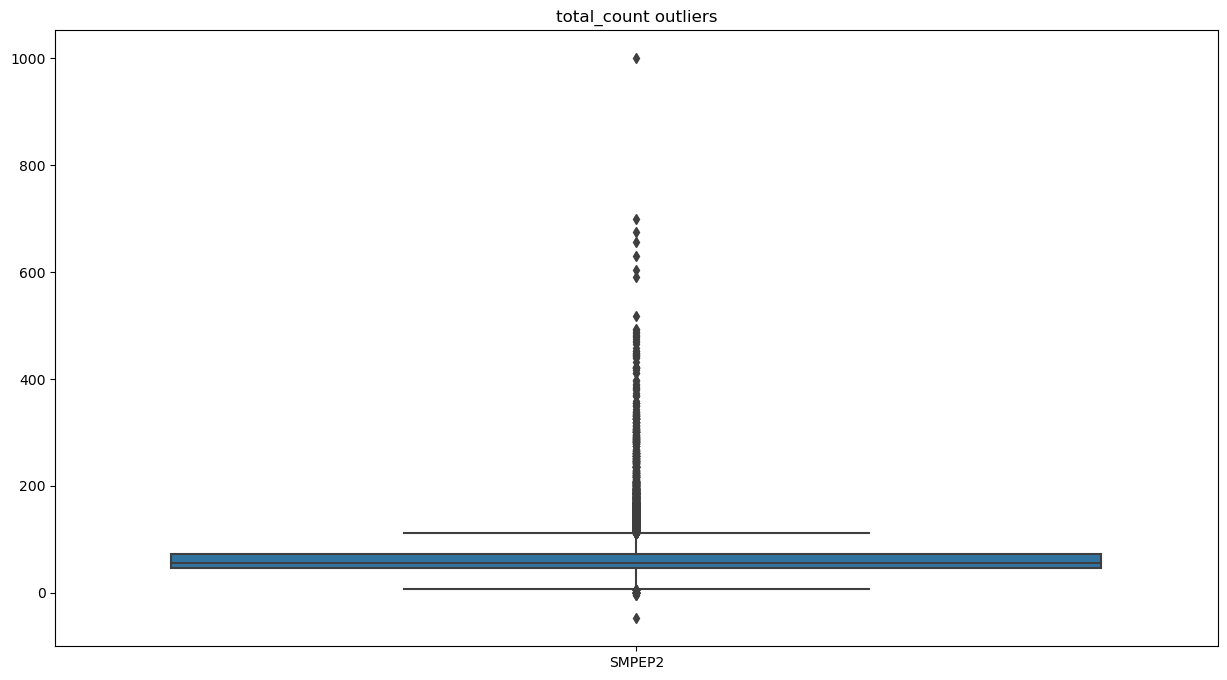

In [56]:
## The target is SMEP2
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['SMPEP2']])
ax.set_title('total_count outliers')
plt.show()

In [59]:
cols = ['SMPEP2']
Q1=df.quantile(0.20)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
df.describe()

,level_0,index,CO2Intensity,SystemLoadEA,Day,ForecastWindProduction,SMPEA,ORKTemperature,ORKWindspeed,ActualWindProduction,Month,SystemLoadEP2,SMPEP2
count,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.00000,30284.000000,30284.000000,30284.000000,30284.000000
mean,15297.091203,16427.987881,489.440125,3941.137281,15.477447,521.479775,58.829567,9.777440,19.22854,500.387994,6.310824,3707.202335,57.565551
std,8853.584742,9479.134687,85.023533,825.164680,8.807416,402.890764,22.775291,4.489741,9.45169,367.549060,3.414700,802.998897,17.298474
min,0.000000,0.000000,0.000000,2183.940000,1.000000,0.900000,0.000000,-4.000000,0.00000,1.000000,1.000000,1809.960000,6.510000
25%,7621.750000,8307.750000,433.240000,3239.615000,8.000000,175.870000,44.910000,7.000000,13.00000,187.000000,3.000000,3013.297500,45.110000
50%,15277.500000,16199.500000,492.185000,3999.465000,15.000000,417.995000,53.780000,10.000000,18.50000,423.000000,6.000000,3770.950000,53.860000
75%,22974.250000,24831.250000,547.262500,4558.450000,23.000000,807.105000,67.580000,13.000000,24.10000,764.000000,9.000000,4350.252500,67.840000
max,30620.000000,32767.000000,842.880000,6414.100000,31.000000,1673.800000,474.390000,25.000000,72.20000,1505.000000,12.000000,6049.550000,106.260000


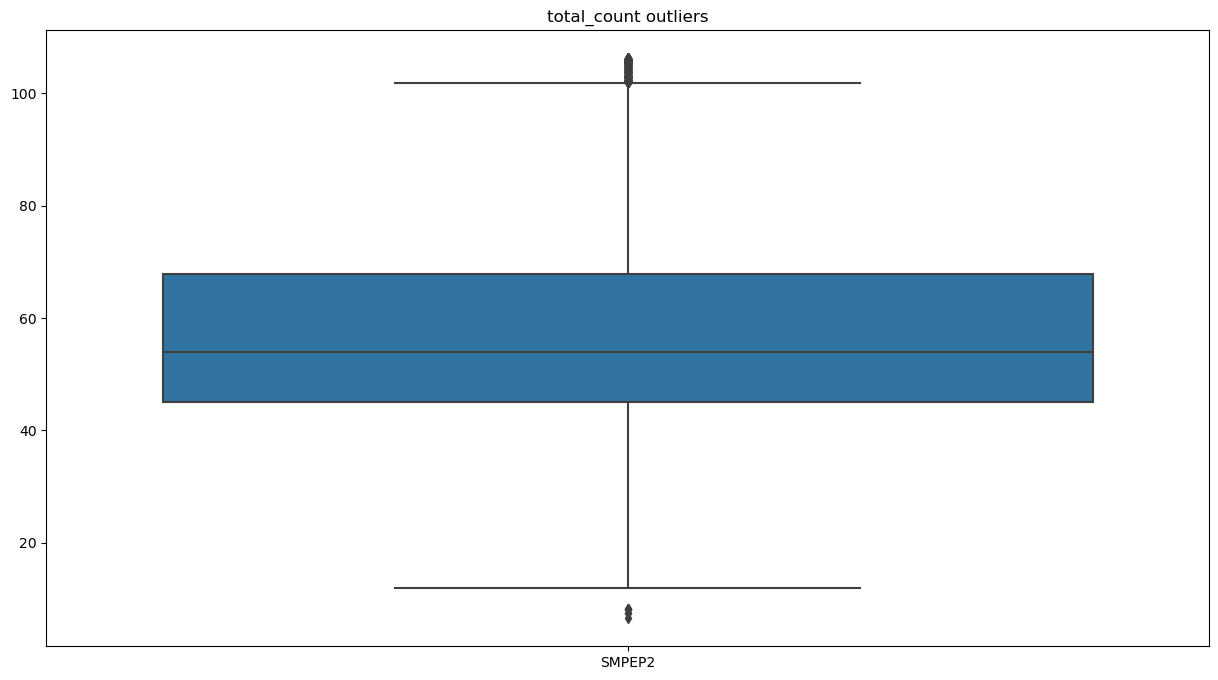

In [60]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['SMPEP2']])
ax.set_title('total_count outliers')
plt.show()

## Regression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,cross_val_predict
from mlxtend.plotting import plot_learning_curves

In [75]:
X = df.drop(['SMPEP2'],axis=1).values
y = df['SMPEP2'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [77]:
def Model(model):
    
    print("MSE (LinearRegression): ", metrics.mean_squared_error(y_test, y_predict))
    print("R2_SCORE (LinearRegression): ", metrics.r2_score(y_test, y_predict))
    print("MAPE (LinearRegression): ", metrics.mean_absolute_percentage_error(y_test, y_predict))

## Linear Regression

In [78]:
from sklearn import linear_model

In [79]:
linear = make_pipeline(preprocessing.StandardScaler(),LinearRegression())
linear.fit(X_train, y_train)
y_predict= linear.predict(X_test)


In [80]:
Model(linear)

MSE (LinearRegression):  158.59895568117292
R2_SCORE (LinearRegression):  0.4533062562839848
MAPE (LinearRegression):  0.1687416046607068


## DecisionTree

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dtr=make_pipeline(preprocessing.StandardScaler(),DecisionTreeRegressor())
dtr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [70]:
y_predict= dtr.predict(X_test)

In [71]:
Model(dtr)

MSE (LinearRegression):  118.78090319640734
R2_SCORE (LinearRegression):  0.5905598724057546
MAPE (LinearRegression):  0.09828710891227882


## Polynomial

In [72]:
poly = make_pipeline(preprocessing.StandardScaler(),PolynomialFeatures(degree=3, include_bias=False), 
              Ridge(alpha=1))
poly.fit(X_train, y_train)
y_predict= poly.predict(X_test)

In [73]:
Model(poly)

MSE (LinearRegression):  126.43201518386368
R2_SCORE (LinearRegression):  0.5641863377374583
MAPE (LinearRegression):  0.14777256658932206


## RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier

In [83]:
random= make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(min_samples_split=3))
random.fit(X_train, y_train)
y_predict= random.predict(X_test)

In [84]:
Model(random)

MSE (LinearRegression):  53.71609635434494
R2_SCORE (LinearRegression):  0.8148395511960294
MAPE (LinearRegression):  0.08349982965713552


## Gradeint Boosting

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
gradient= make_pipeline(preprocessing.StandardScaler(),GradientBoostingRegressor(loss='absolute_error', learning_rate=0.5))
gradient.fit(X_train, y_train)
y_predict= gradient.predict(X_test)

In [87]:
Model(gradient)

MSE (LinearRegression):  120.57933118206925
R2_SCORE (LinearRegression):  0.5843606554937488
MAPE (LinearRegression):  0.12600843988857352


## SVM

In [88]:
from sklearn.svm import SVR

In [89]:
svr=make_pipeline(preprocessing.StandardScaler(),SVR(kernel='rbf'))
svr.fit(X_train, y_train)
y_predict= svr.predict(X_test)

In [90]:
Model(svr)

MSE (LinearRegression):  140.66908025116948
R2_SCORE (LinearRegression):  0.5151108922671837
MAPE (LinearRegression):  0.1387119274538769


به صورت واترمارک کنید و خروجی را ذخیره کنید logo.pngروی عکس یکی از دوستان یا خانواده